In [1]:
import torch 
import torch.nn as nn 
import torch.optim as optim 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split 

torch.manual_seed(0)
X = torch.linspace(-3, 3, 100).reshape(-1, 1) 
y = 2 * X + 0.5 * torch.randn_like(X)

linear = nn.Linear(1, 1) # Linear is required for the linear parameter Wx + b

epsilon = 0.1 
C = 1.0 
lr = 0.01 
epochs = 2000
optimizer = optim.Adam(linear.parameters(), lr=lr)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 


In [2]:
#Using epsilon insensitive loss for SVR accuracy
def epsilon_insensitive_loss(y_pred, y_true, epsilon):
    error = torch.abs(y_pred-y_true) 
    loss = torch.clamp(error-epsilon, min = 0) 
    return torch.mean(loss)

for epoch in range(epochs): 
    linear.train()
    optimizer.zero_grad()

    y_pred = linear(X_train)
    reg_loss = C * torch.sum(linear.weight ** 2)
    loss = epsilon_insensitive_loss(y_pred, y_train, epsilon)
    loss.backward() 
    optimizer.step()
    if (epoch +1)%100 == 0: 
        print('epoch:', epoch+1, 'Loss: ', loss.item())

linear.eval() 
with torch.no_grad(): 
    y_pred = linear(X_test)
    test_loss = epsilon_insensitive_loss(y_pred, y_test, epsilon) 
    print("Test Loss", test_loss.item())

epoch: 100 Loss:  1.7472116947174072
epoch: 200 Loss:  0.47098225355148315
epoch: 300 Loss:  0.3070526719093323
epoch: 400 Loss:  0.30694684386253357
epoch: 500 Loss:  0.30693888664245605
epoch: 600 Loss:  0.30694395303726196
epoch: 700 Loss:  0.30693912506103516
epoch: 800 Loss:  0.30694380402565
epoch: 900 Loss:  0.3069378435611725
epoch: 1000 Loss:  0.3069424033164978
epoch: 1100 Loss:  0.3069562315940857
epoch: 1200 Loss:  0.30694690346717834
epoch: 1300 Loss:  0.30694326758384705
epoch: 1400 Loss:  0.30695825815200806
epoch: 1500 Loss:  0.3069455027580261
epoch: 1600 Loss:  0.3069525361061096
epoch: 1700 Loss:  0.30695033073425293
epoch: 1800 Loss:  0.3069533705711365
epoch: 1900 Loss:  0.3069443106651306
epoch: 2000 Loss:  0.306955486536026
Test Loss 0.33137935400009155


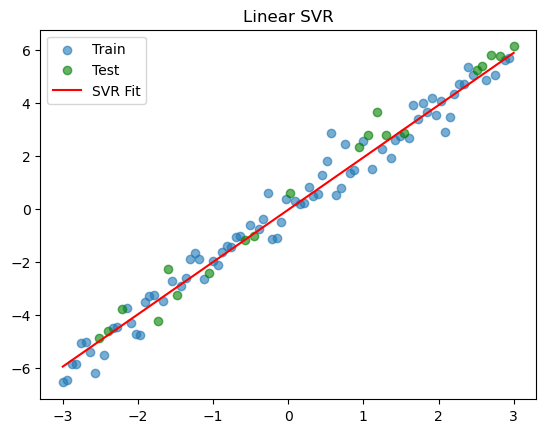

In [3]:
with torch.no_grad():
    X_full = torch.linspace(-3, 3, 100).view(-1, 1)
    y_full_pred = linear(X_full)
    
plt.scatter(X_train.numpy(), y_train.numpy(), label="Train", alpha=0.6)
plt.scatter(X_test.numpy(), y_test.numpy(), label="Test", alpha=0.6, color='green')
plt.plot(X_full.numpy(), y_full_pred.numpy(), label="SVR Fit", color="red")
plt.title("Linear SVR")
plt.legend()
plt.show()

In [4]:
# Sklearn implementation of SVR and comparing it with linear regression
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression
# Using same data from above cells 
lr = LinearRegression()
lr.fit(X_train, y_train) 
svr = SVR(C=0.1, epsilon=0.1, kernel='linear')
svr.fit(X_train, y_train.ravel()) 

y_pred_train_lr = lr.predict(X_test) 
y_pred_test_lr = lr.predict(X_test) 

y_pred_train_svr = svr.predict(X_train)
y_pred_test_svr = svr.predict(X_test) 

X_full = np.linspace(-3, 3, 100).reshape(-1, 1) 
y_full_pred_lin = lr.predict(X_full)


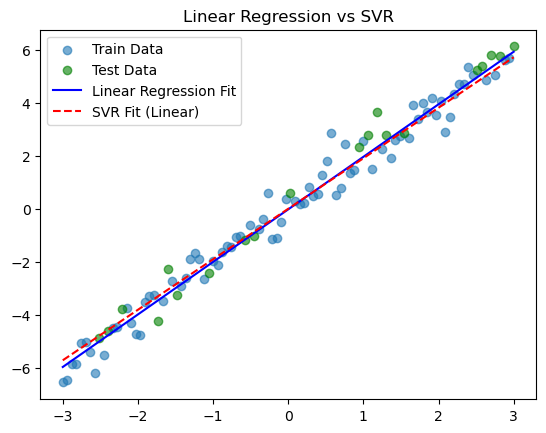

In [5]:

# SVR predictions for the full range for both linear regression and SVR
y_full_pred_svr = svr.predict(X_full)

plt.scatter(X_train, y_train, label="Train Data", alpha=0.6)
plt.scatter(X_test, y_test, label="Test Data", alpha=0.6, color='green')
plt.plot(X_full, y_full_pred_lin, label="Linear Regression Fit", color="blue")
plt.plot(X_full, y_full_pred_svr, label="SVR Fit (Linear)", color="red", linestyle='--')

plt.title("Linear Regression vs SVR")
plt.legend()
plt.show()